In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import matplotlib.dates as mdates

### Reading the data

In [13]:
df = pd.read_csv("/mnt/e/PdM/DataX/MetroPT/Modified_df.csv")
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,imminent_failure,Failure Component Encoded,Failure Type Encoded
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,0,1,1,0,0,0,0,0,3,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,0,1,1,0,0,0,0,0,3,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,0,1,1,0,0,0,0,0,3,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,0,1,1,0,0,0,0,0,3,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,0,1,1,0,0,0,0,0,3,1


In [14]:
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'imminent_failure', 'Failure Component Encoded',
       'Failure Type Encoded'],
      dtype='object')


## Time Series FFT with Timestamps

This script performs a Fast Fourier Transform (FFT) on selected columns of time series data within a specified time range and a set number of windforming FFT.

### Function: `plot_fft_with_timestamp`
- **Parameters:** DataFrame (`df`), columns for FFT, window size, number of windows, start and end time.
- **Functionality:** Converts timestamps, filters data, computes FFT in windows, and plots the results.
- **Usage:** Call with a DataFrame including a 'timestamp' column and numerical a in Jupyter Notebook.

In [5]:


def plot_fft_with_timestamp(df, columns, window_size, num_windows, start_time, end_time):
    # Convert the 'timestamp' column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Filter the data based on the time range
    df_filtered = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

    # Calculate the maximum possible number of windows based on the filtered data
    max_windows = len(df_filtered) // window_size
    num_windows = min(num_windows, max_windows)

    # Create subplot layout
    fig, axes = plt.subplots(num_windows, len(columns), figsize=(12, 4 * num_windows))

    # Loop through each column and window
    for j, column in enumerate(columns):
        for i in range(num_windows):
            # Segment the data based on the current window
            segment = df_filtered[column].iloc[i*window_size:(i+1)*window_size].to_numpy()
            time_segment = df_filtered['timestamp'].iloc[i*window_size:(i+1)*window_size]

            # Perform the FFT
            fft_result = fft(segment)

            # Calculate frequencies
            freq = np.fft.fftfreq(len(fft_result))

            # Plotting
            ax = axes[i, j] if num_windows > 1 else axes[j]
            ax.plot(time_segment, np.abs(fft_result))
            ax.set_title(f'FFT of {column} - Window {i+1}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Amplitude')
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.tight_layout()
    plt.show()


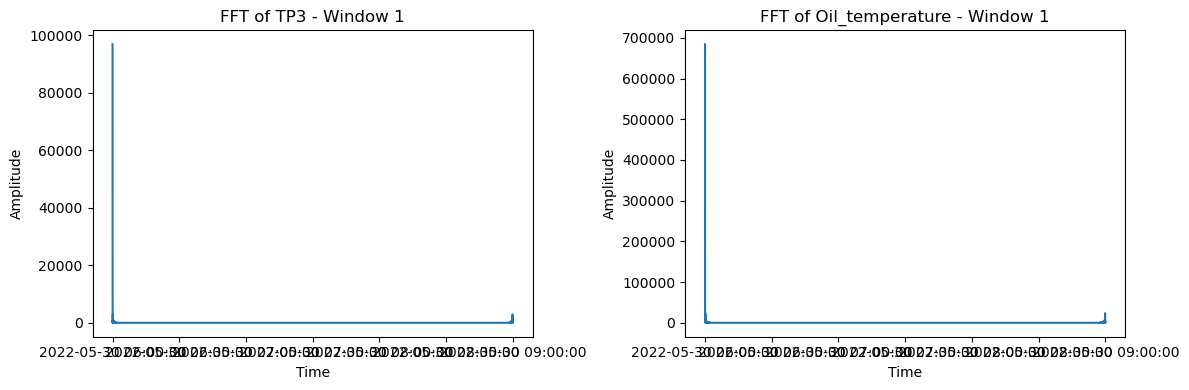

In [8]:
plot_fft_with_timestamp(df, ['TP3', 'Oil_temperature'], 10800, 1, '2022-05-30 06:00:00', '2022-05-31 00:00:00')



## Comprehensive FFT Analysis and Expansion on Time Series Data

This notebook section introduces the `calculate_and_expand_fft` function, which combines the calculation and expansion of FFT results for specified columns within a given time range and window sizes in a time series dataset.

### Function Overview

#### `calculate_and_expand_fft`

- **Purpose**: To calculate FFT coefficients and frequencies for specified columns, and then expand the FFT magnitudes and frequencies into a column-wise format for detailed analysis.
- **Parameters**:
  - `df` (DataFrame): The dataset containing the time series data.
  - `columns` (list): List of column names for FFT analysis.
  - `start_time` (str/datetime): Start time of the window for FFT calculation.
  - `end_time` (str/datetime): End time of the window for FFT calculation.
  - `window_size` (int): The size of each window for FFT calculation.
- **Returns**: A DataFrame where each row corresponds to a single FFT magnitude and frequency for each window and column.

### Implementation

The function processes the data in specified windows, calculates the FFT for each column, and then expands the results. It uses the magnitudes of the FFT coefficients for a more iensive FFT analysis on time series data.

In [33]:
def calculate_and_expand_fft(df, columns, start_time, end_time, window_size):
    """
    Calculate the FFT coefficients and frequencies for specified columns within a given time window
    and for specified window sizes, and then expand the FFT magnitudes and frequencies into a column-wise format.

    Parameters:
    df (DataFrame): The dataset containing the time series data.
    columns (list): List of column names for which to calculate the FFT.
    start_time (str/datetime): The start time of the window for FFT calculation.
    end_time (str/datetime): The end time of the window for FFT calculation.
    window_size (int): The size of each window for FFT calculation.

    Returns:
    DataFrame: A new expanded DataFrame where each row corresponds to a single magnitude/frequency.
    """

    # Convert the 'timestamp' column to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Filter the data based on the provided time range
    df_filtered = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

    # Initialize a list to store expanded rows for all windows
    expanded_rows = []

    # Process each window
    for start in range(0, len(df_filtered), window_size):
        end = min(start + window_size, len(df_filtered))
        window_df = df_filtered.iloc[start:end]

        # Calculate FFT for each specified column
        for column in columns:
            # Check if the column exists in the DataFrame
            if column in window_df.columns:
                # Perform FFT
                fft_result = fft(window_df[column].to_numpy())

                # Calculate frequencies and magnitudes
                freq = np.fft.fftfreq(len(fft_result))
                magnitudes = np.abs(fft_result)

                # Create expanded rows with magnitudes
                for magnitude, frequency in zip(magnitudes, freq):
                    expanded_row = {
                        'window_start': start,
                        'window_end': end,
                        f'{column}_magnitude': magnitude,
                        f'{column}_frequency': frequency
                    }
                    expanded_rows.append(expanded_row)

    # Create a new DataFrame from the expanded rows
    expanded_df = pd.DataFrame(expanded_rows)

    return expanded_df

# Example usage of the function:
# final_fft_df = calculate_and_expand_fft(df, ['Column1', 'Column2'], '2022-01-01', '2022-01-31', 3600)
# This will calculate and expand the FFT results for 'Column1' and 'Column2' into a new DataFrame with each magnitude and frequency in its own row.



In [34]:
final_fft_df = calculate_and_expand_fft(df, ['TP3', 'Oil_temperature'], '2022-01-01', '2022-01-02', 3600)
final_fft_df.head()

,window_start,window_end,TP3_magnitude,TP3_frequency,Oil_temperature_magnitude,Oil_temperature_frequency
0,0,3600,32777.070000,0.000000,NaN,NaN
1,0,3600,424.761914,0.000278,NaN,NaN
2,0,3600,918.394026,0.000556,NaN,NaN
3,0,3600,532.018562,0.000833,NaN,NaN
4,0,3600,257.984446,0.001111,NaN,NaN
